# Can we classify breast cancer tumours as malignant or benign with machine learning?

Data from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 

Primary source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Data citations:

    Creators:

    1. Dr. William H. Wolberg, General Surgery Dept.
    University of Wisconsin, Clinical Sciences Center
    Madison, WI 53792
    wolberg '@' eagle.surgery.wisc.edu

    2. W. Nick Street, Computer Sciences Dept.
    University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
    street '@' cs.wisc.edu 608-262-6619

    3. Olvi L. Mangasarian, Computer Sciences Dept.
    University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
    olvi '@' cs.wisc.edu

    Donor:

    Nick Street

---

We will implement logistic regression from scratch, and compare the results to those from an optimised implementation in the scikit-learn package.

---

# Import the data:

In [1]:
import pandas as pd

data = pd.read_csv(r'data.csv')
print(data.shape)

data.head(5)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


---

# Cleaning and preparing data:

In [2]:
# need to split into target and features, as well as drop unnecessary columns
targets = data.diagnosis
features = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)

# any missing data?
print(targets.isnull().any())
print(features.isnull().any())

# no nulls, so no missing data

False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtyp

In [3]:
# classes should be converted to numbers, 1 for malignant/0 for benign
targets_num = targets.apply(lambda x: 0 if x == 'B' else 1)
targets_num.sample(10)

100    1
443    0
312    0
129    1
444    1
368    1
262    1
429    0
31     1
410    0
Name: diagnosis, dtype: int64

---

# Scale the features:

In [4]:
# split data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets_num, test_size = 0.2, random_state = 0)

In [5]:
# scale features, keeping mean and standard deviation for later scaling of test data
x_scaler_mean = x_train.mean()
x_scaler_std = x_train.std()
x_train = (x_train - x_scaler_mean) / x_scaler_std

x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,-1.149100,-0.390212,-1.127309,-0.957709,0.310642,-0.595339,-0.801714,-0.801608,0.294215,0.094148,...,-1.042029,0.213298,-1.034905,-0.847874,0.342122,-0.729295,-0.811427,-0.757150,-0.016130,-0.384611
427,-0.936958,0.679766,-0.947159,-0.820622,-0.608966,-0.908867,-0.659943,-0.897728,0.754104,-0.425003,...,-0.714867,1.065669,-0.689163,-0.667962,-0.095432,-0.537275,-0.374636,-0.606203,0.096584,-0.385733
406,0.573490,-1.032199,0.513376,0.408137,-0.106044,-0.362620,-0.417531,-0.088348,-0.271522,-0.574589,...,0.297288,-0.976743,0.261848,0.113763,-0.524147,-0.520294,-0.182788,-0.023693,-0.200282,-0.750616
96,-0.546618,-0.315675,-0.576987,-0.565992,0.586017,-0.648617,-0.804413,-0.499515,0.330714,0.539972,...,-0.700554,-0.757093,-0.734928,-0.658241,-0.815850,-1.033783,-1.090433,-0.851607,-1.075002,-0.546282
490,-0.526818,0.790370,-0.560946,-0.522995,-1.050290,-1.016413,-0.904154,-0.934777,-0.968655,-0.426470,...,-0.426556,1.057473,-0.421959,-0.440470,-0.303160,-0.466737,-0.723768,-0.782257,0.310898,-0.082039


In [6]:
# repeat for x_test, remember to scale by the mean and std dev. of the training set:
x_test = (x_test - x_scaler_mean) / x_scaler_std

x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,-0.201534,0.328717,-0.130724,-0.271157,1.028066,0.863168,0.732832,0.855755,1.119096,1.551877,...,0.031470,0.675545,0.185082,-0.062739,1.102317,0.873481,1.217750,1.387802,1.080843,1.538603
457,-0.255277,1.466020,-0.317455,-0.323646,-0.616212,-1.015423,-0.768167,-0.725696,-0.694912,-1.001348,...,-0.389751,1.424648,-0.464771,-0.423417,-0.157309,-0.950705,-0.643623,-0.832777,-0.730512,-0.876361
439,-0.026164,-0.839844,-0.091650,-0.132115,-1.214066,-0.940952,-0.856211,-0.574391,-0.804409,-0.998415,...,-0.275244,-1.021000,-0.310058,-0.327918,-1.284343,-0.980749,-1.026317,-0.494294,-1.219466,-0.920147
298,0.041721,-0.236328,-0.024608,-0.057848,-2.221359,-1.012452,-0.806341,-0.905501,-0.636513,-0.998415,...,-0.007381,-0.045692,-0.036358,-0.104861,-1.679909,-0.229652,-0.555964,-0.599314,-0.425709,-0.377874
37,-0.306191,-0.176217,-0.378739,-0.363013,-0.477076,-1.300430,-0.795159,-0.504179,-1.249699,-0.592187,...,-0.604450,-0.447289,-0.666429,-0.571781,-1.566764,-1.343300,-1.097796,-0.984643,-1.456006,-1.223841


---

# Implementing unregularised logistic regression:

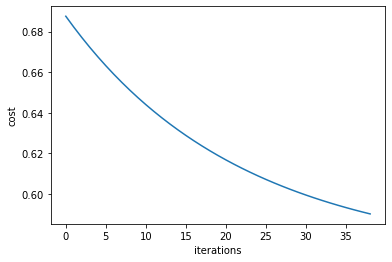

In [7]:
def train_logistic_regression(features, targets, alpha = 0.001, epsilon = 0.001, count = 1000, plot = False):
    """
    trains an unregularised logistic regression model on the given features and targets, returning the optimised theta parameters
    'alpha' is the learning rate
    'epsilon' is the change in J(theta) between iterations below which we will consider it to have converged
    'count' is the maximum number of iterations to run gradient descent for (in the case it doesn't converge before that)
    'plot' will plot the graph of cost vs number of iterations if toggled to True, useful for troubleshooting.
    """
    
    import numpy as np

    # add intercept term to the features
    features['intercept'] = 1
    # rearrange so intercept term is first column
    features = features[['intercept']+features.columns.tolist()[:-1]] 
    
    # initialise theta as 0s
    init_theta = np.array([np.zeros(features.shape[1])]).T # produces a numpy array of shape nx1 (as opposed to (n,))
      
    # implement gradient descent
    def grad_desc(X, y, theta, alpha, epsilon, count):
        """
        implements gradient descent to optimise theta by minimising the cost function
        """
        
        def sigmoid(z):
            """
            maps any z (matrix, vector, or scalar) to the (0, 1) interval, using a sigmoid curve
            """

            return 1 / (1 + np.exp(-z))

        # define cost function for logistic regression
        def lr_cost(theta, X, y):
            """
            vectorised implementation of cost function for logistic regression, returning the cost for given theta parameters
            """

            m = len(y)
            h = sigmoid(X.dot(theta)) # mx31 * 31x1 = mx1 vector (31 = num. features + intercept term)
            y_tp = y.T # transposes y from mx1 to a 1xm vector (horizontal)
            J = 1/m * ((-y_tp.dot(np.log(h))) - ((1-y).T.dot(np.log(1-h)))) # 1xm * mx1 = 1x1

            # uncomment following if debugging:
    #         print('\ndebugging lr_cost:')
    #         print('h should be mx1, h is:', h.shape)
    #         print('y should be mx1, y is:', y.shape)
    #         print('y_tp should be 1xm, is:', y_tp.shape)
    #         print('-y_tp*log(h) should be 1x1, is:', (-y_tp.dot(np.log(h))).shape)
    #         print('(1-y).T should be 1xm, is:', (1-y).T.shape)

            return J
    
        y = np.array([targets]).T
        m = len(y)
        costs = []
        iterations = []

        for i in range(count):
            
            # calculate change in theta
            delta = (X.T.dot(X.dot(theta) - y))/m # 31xm * (mx31 * 31x1 = mx1) = 31x1 vector
            
            # update theta
            theta = theta - alpha * delta 

            # calculate and store cost with new theta
            new_cost = lr_cost(theta, X, y)[0][0]
            costs.append(new_cost)
            iterations.append(i)

            # stop gradient descent if difference in costs between steps is less than epsilon
            if len(costs) > 1:
                if costs[-2] - new_cost <= epsilon:
                    break
                    
            # uncomment if debugging:
#            print('\ndebugging grad_desc:')
#            print('X should be mx31, X:', X.shape)
#            print('X.T should be 31xm, X.T:', X.T.shape)
#            print('theta should be 31x1, theta:', theta.shape)
#            print('y should be mx1, y:', y.shape)
#            print('X * theta should be mx1, X * theta:', X.dot(theta).shape)
#            print('X * theta - y should be mx1, X * theta - y:', (X.dot(theta) - y).shape)
#            print('delta should be 31x1, delta:', delta.shape)

        return theta, iterations, costs

    final_theta, iterations, final_costs = grad_desc(features, targets, init_theta, alpha = alpha, epsilon = epsilon, count = count)
    
    # plot cost against theta if toggled
    if plot:
        import matplotlib.pyplot as plt

        plt.figure()
        plt.plot(iterations, final_costs)
        plt.xlabel('iterations')
        plt.ylabel('cost')
        plt.show()
        
    return final_theta

lr_model = train_logistic_regression(x_train, y_train, alpha = 0.003, plot = True)

Plot shows steady decrease in cost as expected, a successful convergence.

In [8]:
# use the optimised theta parameters to predict classes of test data

def logistic_regression_predictor(features, lr_model, boundary = 0.5):
    """
    uses the given trained logistic regression model (optimised theta parameters) to predict classes from the given features
    'boundary' is the value (float between 0 and 1) above which to predict malignancy
    """
    
    # add intercept term to the features
    features['intercept'] = 1
    # rearrange so intercept term is first column 
    features = features[['intercept']+features.columns.tolist()[:-1]]    
    
    def sigmoid(z):
        """
        maps any z (matrix, vector, or scalar) to the (0, 1) interval, using a sigmoid curve
        """
        from numpy import exp
        
        return 1 / (1 + exp(-z))
    
    # use the logistic regression model to map the features to the (0, 1) interval
    lr_y_mapped = sigmoid(features.dot(lr_model))
    
    # convert the result to a prediction of class based on the chosen boundary
    lr_y_pred = lr_y_mapped[0].apply(lambda x: 1 if x >= boundary else 0)
    
    return lr_y_pred

lr_y_pred = logistic_regression_predictor(x_test, lr_model)
lr_y_pred.head()

512    1
457    0
439    0
298    0
37     0
Name: 0, dtype: int64

---

# How accurate is the model at predicting the classes of new data?

A common way to measure the accuracy of predictive models is with confusion matrices. These show the number of true positives (predict 1, actually 1), false positives (predict 1, actually 0), false negatives (predict 0, actually 1) and true negatives (predict 0, actually 0). Confusion matrices are arranged as follows:

                                        TP FP

                                        FN TN

These numbers can be used to calculate metrics such as **precision** (what proportion of data points classified as the positive class were actually positive) and **recall** (what proportion of actual positives were identified as positive). A good model needs a high score in both, which can be measured by the **f1 score**, their harmonic mean. All of these metrics run from 0 (lowest) to 1 (highest).

In [13]:
# compare with actual results
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion matrix:')
print(confusion_matrix(y_test, lr_y_pred))

Confusion matrix:
[[54 13]
 [ 1 46]]


In [15]:
# calculate precision/recall/f1-score
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        67
           1       0.78      0.98      0.87        47

    accuracy                           0.88       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.90      0.88      0.88       114



So a final f1 score of 0.88 - not bad!

---

# Adding regularisation to the logistic regression model:

Overfitting to the training data can sometimes negatively affect the accuracy of the final model. Even though our f1 score is pretty decent already, it may improve if we account for this. **Regularisation** is used to help avoid this overfitting.

In [19]:
# note: difference between this code and the prior is the addition of the regularisation term to J in the lr_cost function

def train_reg_logistic_regression(features, targets, lambda_reg, alpha = 0.001, epsilon = 0.001, count = 1000, plot = False):
    """
    trains a regularised logistic regression model on the given features and targets, returning the optimised theta parameters
    'lambda_reg' is the regularisation parameter
    'alpha' is the learning rate
    'epsilon' is the change in J(theta) between iterations below which we will consider it to have converged
    'count' is the maximum number of iterations to run gradient descent for (in the case it doesn't converge before that)
    'plot' will plot the graph of cost vs number of iterations if toggled to True, useful for troubleshooting.
    """
        
    import numpy as np

    # add intercept term to the features
    features['intercept'] = 1
    # rearrange so intercept term is first column
    features = features[['intercept'] + features.columns.tolist()[:-1]] 
      
    # initialise theta as 0s
    init_theta = np.array([np.zeros(features.shape[1])]).T # produces an array of shape nx1 (as opposed to (31,))
      
    # implement gradient descent
    def grad_desc(X, y, theta, lambda_reg, alpha, epsilon, count):
        """
        implements gradient descent to optimise theta by minimising the cost function
        """
        
        def sigmoid(z):
            """
            maps any z (matrix, vector, or scalar) to the (0, 1) interval, using a sigmoid curve
            """

            return 1 / (1 + np.exp(-z))

        # define cost function for logistic regression
        def lr_cost(theta, X, y, lambda_reg):
            """
            vectorised implementation of REGULARISED cost function for logistic regression
            this calculates both the cost of some particular theta, as well as the gradient for use in gradient descent
            """

            m = len(y)
            h = sigmoid(X.dot(theta)) # mx31 * 31x1 = mx1 vector (31 = num. features + intercept term)
            y_tp = y.T # transposes y from mx1 to a 1xm vector (horizontal)
            
            # calculate cost, this time WITH regularisation term
            J = 1/m * ((-y_tp.dot(np.log(h))) - ((1-y).T.dot(np.log(1-h)))) + lambda_reg/(2*m) * sum(theta[1:].values**2) # 1xm * mx1 = 1x1
                        
            return J
    
        y = np.array([targets]).T
        m = len(y)
        costs = []
        iterations = []

        for i in range(count):
            
            delta = (X.T.dot(X.dot(theta) - y))/m # 31xm * (mx31 * 31x1 = mx1) = 31x1 vector
            theta = theta - alpha * delta # update theta

            # calculate and store cost with new theta
            new_cost = lr_cost(theta, X, y, lambda_reg)[0][0]
            costs.append(new_cost)
            iterations.append(i)

            # stop gradient descent if difference in costs between steps is less than epsilon
            if len(costs) > 1:
                if costs[-2] - new_cost <= epsilon:
                    break

        return theta, iterations, costs
    
    final_theta, iterations, final_costs = grad_desc(features, targets, init_theta, lambda_reg=lambda_reg, alpha=alpha, epsilon=epsilon, count=count)
    
    # plot cost against theta if toggled
    if plot:
        import matplotlib.pyplot as plt

        plt.figure()
        plt.plot(iterations, final_costs)
        plt.xlabel('iterations')
        plt.ylabel('cost')
        plt.show()
        
    return final_theta

The magnitude of the regularisation parameter *lambda_reg* is determined through testing various possible values on a cross-validation set, and choosing the one that minimises the error.

In [20]:
# split data into train, test, and cross-validation sets (for determining the value of the regularisation parameter)
from sklearn.model_selection import train_test_split # if haven't imported already

reg_x_train, x_temp, reg_y_train, y_temp = train_test_split(features, targets_num, test_size = 0.4, random_state = 0)
reg_x_cv, reg_x_test, reg_y_cv, reg_y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 0)

# scale all feature sets (using mean and std dev. of the training set)
reg_x_scaler_mean = reg_x_train.mean()
reg_x_scaler_std = reg_x_train.std()

reg_x_train = (reg_x_train - reg_x_scaler_mean) / reg_x_scaler_std
reg_x_cv = (reg_x_cv - reg_x_scaler_mean) / reg_x_scaler_std
reg_x_test = (reg_x_test - reg_x_scaler_mean) / reg_x_scaler_std

len(reg_x_train), len(reg_x_cv), len(reg_x_test)

(341, 114, 114)

Determine value of regularisation parameter:

In [21]:
# train models with various values of regularisation parameter on the training data
lambda_regs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
models = []

for i in lambda_regs:
    models.append(train_reg_logistic_regression(reg_x_train, reg_y_train, lambda_reg = 10**i, alpha = 0.003))

# make predictions based on each of these models    
predictions = []
for model in models:
    predictions.append(logistic_regression_predictor(reg_x_cv, model))
    
# determine best regularisation parameter from cross-validation set  
def error_calc(prediction, actual):
    """
    calculates the error in the given predictions
    """
    
    m = len(prediction)
    J = 1/(2*m) * sum((prediction - actual)**2)
    
    return J
    
errors = []
for i in predictions:
    errors.append(error_calc(i, reg_y_cv))

# find model, and therefore regularisation parameter, that led to the lowest error    
min_reg_error = errors.index(min(errors))
lambda_choice = lambda_regs[min_reg_error]
model_choice = models[min_reg_error]

# calculate final model error on TEST set (not cross-validation, so result is properly generalised to new data)
final_pred = logistic_regression_predictor(reg_x_test, model_choice)

error_calc(final_pred, reg_y_test)

0.06140350877192982

In [22]:
# how accurate is the regularised model?
print('Confusion matrix:')
print(confusion_matrix(reg_y_test, final_pred))
print(classification_report(reg_y_test, final_pred))

Confusion matrix:
[[58 10]
 [ 4 42]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        68
           1       0.81      0.91      0.86        46

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



As we can see, the addition of regularisation did not change the final f1 score of the model. This suggests that overfitting is not the main source of error.

---
# Changing the decision boundary

In this context of diagnosing breast cancer tumour malignancy, it can be argued that false positives (AKA type I error) are not as bad as false negatives (AKA type II error). A false positive result would be likely to lead to further tests to confirm the diagosis, while a false negative could lead to actually dangerous tumours being overlooked until it is too late.

As such, we can change the position of the decision boundary to err on the side of caution and avoid false negatives (predict malignancy more often), at the cost of more false positives and a worse overall f1 score.

In [36]:
changed_boundary_pred = logistic_regression_predictor(reg_x_test, model_choice, boundary = 0.47)

print('Confusion matrix:')
print(confusion_matrix(reg_y_test, changed_boundary_pred))
print(classification_report(reg_y_test, changed_boundary_pred))

Confusion matrix:
[[45 23]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.66      0.80        68
           1       0.67      1.00      0.80        46

    accuracy                           0.80       114
   macro avg       0.83      0.83      0.80       114
weighted avg       0.87      0.80      0.80       114



---

# Using optimised logistic regression implementation from scikit-learn:

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, targets_num, test_size = 0.2, random_state = 0)

# scale both feature sets
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()

# train sklearn logistic regression model
sklearn_lr = LogisticRegression(solver = 'lbfgs')
sklearn_lr.fit(x_train, y_train)

# predict test set with model
sklearn_y_pred = sklearn_lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion matrix:')
print(confusion_matrix(y_test, sklearn_y_pred))

Confusion matrix:
[[65  2]
 [ 3 44]]


In [26]:
print(classification_report(y_test, sklearn_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Notably better than our code written from scratch (f1 score of 0.96 compared to our 0.88). An argument for not reinventing the wheel perhaps! Their results do have some false negatives however, which as we discussed are to be avoided!